In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('Mall_Customers.csv')

In [2]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Change the column name
df.rename(columns={'Genre': 'Gender','Annual Income (k$)':'Annual Income'}, inplace=True)
df

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# checking for null values in each column
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income             0
Spending Score (1-100)    0
dtype: int64

In [5]:
# To calculate the probability that a randomly selected customer
# falls into a specific age group 
# (e.g., under 30, between 30 and 40, over 40)

# Total number of customers (sample size)
total_customers = len(df)
print(total_customers)

200


In [6]:
# Count of customers under 30
under_30_count = len(df[df['Age'] < 30])
print(under_30_count)

55


In [7]:
# Probability of selecting a customer under 30
probability_under_30 = under_30_count / total_customers
print(probability_under_30)

0.275


In [8]:
# Filter the DataFrame to select customers under the age of 30
under_30_customers = df[df['Age'] < 30]

# Count the number of male and female customers in the under 30 group
male_count = len(under_30_customers[under_30_customers['Gender'] == 'Male'])
female_count = len(under_30_customers[under_30_customers['Gender'] == 'Female'])

print("male counts",male_count)
print("female counts",female_count)

male counts 26
female counts 29


In [9]:
# If there are male customers in the dataset
if male_count > 0:
    # Find the minimum and maximum age values for male customers
    min_male_age = df[df['Gender'] == 'Male']['Age'].min()
    max_male_age = df[df['Gender'] == 'Male']['Age'].max()

    print("Range of male ages:", min_male_age, "to", max_male_age)
else:
    print("There are no male customers in the dataset.")

Range of male ages: 18 to 70


In [10]:
# Calculate the probability of selecting a male customer
probability_male = male_count / total_customers
print(probability_male)
# Calculate the probability of selecting a female customer
probability_female = female_count / total_customers
print(probability_female)

0.13
0.145


In [11]:
# compliment example for this dataset
# Calculating the complement probability of not selecting a male customer
probability_not_male = 1 - probability_male
print(probability_not_male)

0.87


In [12]:
probability_not_female = 1 - probability_female
print(probability_not_female)

0.855


In [13]:
print(probability_male + probability_not_male)

1.0


In [14]:
# Calculate the intersection probability
probability_male_and_under_30 = probability_male * probability_under_30
print(probability_male_and_under_30)
print(probability_male_and_under_30*100)

0.035750000000000004
3.575


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

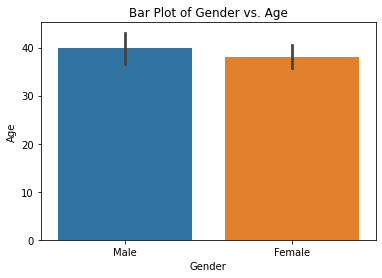

In [16]:
# Create a bar plot
sns.barplot(x='Gender', y='Age', data=df)

# Add labels and a title
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Bar Plot of Gender vs. Age')

# Show the plot
plt.show()

In [17]:
# Calculate the median (50th percentile) of the 'Age' column
median_age = df['Age'].median()
print(median_age)

36.0


In [18]:
# Calculate quartiles for the 'Age' column
quartiles = df['Age'].quantile([0.25, 0.5, 0.75])

# Print the quartiles
print("1st Quartile (25th percentile):", quartiles[0.25])
print("2nd Quartile (Median, 50th percentile):", quartiles[0.5])
print("3rd Quartile (75th percentile):", quartiles[0.75])

1st Quartile (25th percentile): 28.75
2nd Quartile (Median, 50th percentile): 36.0
3rd Quartile (75th percentile): 49.0


In [19]:
# Separate data for male and female customers
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Calculate quartiles for the 'Age' column for male customers
male_quartiles = male_data['Age'].quantile([0.25, 0.75])

# Calculate quartiles for the 'Age' column for female customers
female_quartiles = female_data['Age'].quantile([0.25, 0.75])

# Print the quartiles for male and female customers
print("Male Customers - 25th Percentile:", male_quartiles[0.25])
print("Male Customers - 75th Percentile:", male_quartiles[0.75])

print("Female Customers - 25th Percentile:", female_quartiles[0.25])
print("Female Customers - 75th Percentile:", female_quartiles[0.75])

Male Customers - 25th Percentile: 27.75
Male Customers - 75th Percentile: 50.5
Female Customers - 25th Percentile: 29.0
Female Customers - 75th Percentile: 47.5


In [20]:
data_to_analyze = df['Age']

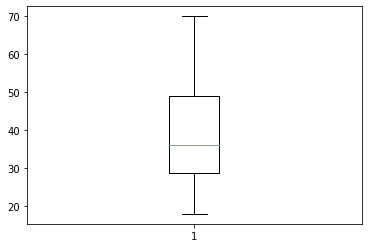

In [21]:
# Create a box plot
plt.boxplot(data_to_analyze)
plt.show()

In [22]:
# Calculate IQR for male customers' ages
male_iqr=male_quartiles[0.75]-male_quartiles[0.25]

# Calculate IQR for female customers' ages
female_iqr=female_quartiles[0.75]-female_quartiles[0.25]

print("Male Customers:")
print("Q1:", male_quartiles[0.25])
print("Q3:", male_quartiles[0.75])
print("IQR:", male_iqr)

print("\nFemale Customers:")
print("Q1:", female_quartiles[0.25])
print("Q3:", female_quartiles[0.75])
print("IQR:", female_iqr)

Male Customers:
Q1: 27.75
Q3: 50.5
IQR: 22.75

Female Customers:
Q1: 29.0
Q3: 47.5
IQR: 18.5


In [23]:
data_analyze = male_data['Age']

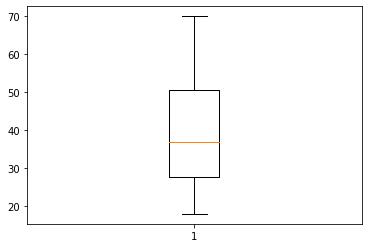

In [24]:
# Create a box plot
plt.boxplot(data_analyze)
plt.show()

In [25]:
# Determine lower and upper bounds for male customers' ages
male_lower_bound = male_quartiles[0.25] - 1.5 * male_iqr
male_upper_bound = male_quartiles[0.75] + 1.5 * male_iqr

# Determine lower and upper bounds for female customers' ages
female_lower_bound = female_quartiles[0.25] - 1.5 * female_iqr
female_upper_bound = female_quartiles[0.75] + 1.5 * female_iqr

print("Male Customers:")
print("Lower Bound:", male_lower_bound)
print("Upper Bound:", male_upper_bound)

print("\nFemale Customers:")
print("Lower Bound:", female_lower_bound)
print("Upper Bound:", female_upper_bound)

Male Customers:
Lower Bound: -6.375
Upper Bound: 84.625

Female Customers:
Lower Bound: 1.25
Upper Bound: 75.25


In [26]:
# male_age=male_quartiles[0.25]
# # Identify outliers for male customers' ages
# male_outliers = male_age[(male_quartiles[0.25] < male_lower_bound) | (male_quartiles[0.25] > male_upper_bound)]

# # Identify outliers for female customers' ages
# female_outliers = female_age[(female_age < female_lower_bound) | (female_age > female_upper_bound)]

# print("Outliers for Male Customers:")
# print(male_outliers)

# print("\nOutliers for Female Customers:")
# print(female_outliers)

In [27]:
# conditional probability
# Weather Forecast: In weather forecasting, P(Rain | Cloudy) represents the probability of rain occurring given that the sky is cloudy. The likelihood of rain is higher when the sky is cloudy compared to when it's clear.

# Card Games: In card games like poker, P(Full House | Three of a Kind) represents the probability of getting a full house (a specific hand) in the game given that you already have three of a kind.

In [28]:
# Calculate marginal probabilities
# total_customers = len(df) alreday calculated above

# Probability of being Male (Event A)
p_male = len(df[df['Gender'] == 'Male']) / total_customers
print(p_male)
# Probability of being Female (Event B)
p_female = len(df[df['Gender'] == 'Female']) / total_customers
print(p_female)
# Probability of age under 30 (Event C)
p_age_under_30 = len(df[df['Age'] < 30]) / total_customers
print(p_age_under_30)
# Probability of age between 30 and 40 (Event D)
p_age_between_30_and_40 = len(df[(df['Age'] >= 30) & (df['Age'] < 40)]) / total_customers
print(p_age_between_30_and_40)
# Probability of age over 40 (Event E)
p_age_over_40 = len(df[df['Age'] >= 40]) / total_customers
print(p_age_over_40)

0.44
0.56
0.275
0.305
0.42


In [29]:
# Calculate Joint Probabilities

# Probability of being Male and Age < 30 (P(A and C))
p_male_and_age_under_30 = len(df[(df['Gender'] == 'Male') & (df['Age'] < 30)]) / total_customers
print(p_male_and_age_under_30)
# Probability of being Female and Age >= 40 (P(B and E))
p_female_and_age_over_40 = len(df[(df['Gender'] == 'Female') & (df['Age'] >= 40)]) / total_customers
print(p_female_and_age_over_40)

0.13
0.23


In [30]:
# Calculate Conditional Probabilities

# Conditional probability of being Male given Age < 30 (P(A | C))
p_male_given_age_under_30 = p_male_and_age_under_30 / p_age_under_30
print(p_male_given_age_under_30)
# Conditional probability of being Female given Age >= 40 (P(B | E))
p_female_given_age_over_40 = p_female_and_age_over_40 / p_age_over_40
print(p_female_given_age_over_40)

0.4727272727272727
0.5476190476190477


In [31]:
#independent events
# prob of being male
print("p_male :",p_male)
# Probability of having annual income > 50
probability_income_gt_50 = len(df[df['Annual Income'] > 50]) / total_customers
print("probability_income_gt_50 :",probability_income_gt_50)
# Probability of being both male and having annual income > 50 (independent events)
probability_both = p_male * probability_income_gt_50

print("Probability (Male and Income > 50):",p_male,"*",probability_income_gt_50, ":", probability_both)

p_male : 0.44
probability_income_gt_50 : 0.63
Probability (Male and Income > 50): 0.44 * 0.63 : 0.2772


In [32]:
# Check if Male and Female are mutually exclusive
probability_both = len(df[(df['Gender'] == 'Male') & (df['Gender'] == 'Female')]) / total_customers

print("Probability (Male):", p_male)
print("Probability (Female):", p_female)
print("Probability (Mutually Exclusive):", probability_both)

Probability (Male): 0.44
Probability (Female): 0.56
Probability (Mutually Exclusive): 0.0


In [33]:
#Bayes theorem

# Calculate P(A), the prior probability of being male

male_customers = len(df[df['Gender'] == 'Male'])
p_A = male_customers / total_customers

# Calculate P(B|A), the conditional probability of high spending score given male

male_high_spend = len(df[(df['Gender'] == 'Male') & (df['Spending Score (1-100)'] > 75)])  # Assuming high score is > 75
p_B_given_A = male_high_spend / male_customers

# Calculate P(B), the overall probability of high spending score
high_spend_customers = len(df[df['Spending Score (1-100)'] > 75])  # Assuming high score is > 75
p_B = high_spend_customers / total_customers

# Calculate P(A|B), the probability of being male given high spending score
p_A_given_B = (p_B_given_A * p_A) / p_B

print("Probability of being male given high spending score:", p_A_given_B)

Probability of being male given high spending score: 0.39473684210526316


In [34]:

# Select the two columns for which you want to calculate covariance
X = df['Age']
Y = df['Annual Income']

# Calculate the means of X and Y
mean_X = X.mean()
mean_Y = Y.mean()

# Calculate the covariance
covariance = sum((X - mean_X) * (Y - mean_Y)) / (len(df) - 1)

print("Covariance between Age and Annual Income:", covariance)

Covariance between Age and Annual Income: -4.548743718592955


In [35]:
# Calculate the deviations from the mean
deviation_x = X - mean_X
deviation_y = Y - mean_Y

# Calculate the product of deviations
product_deviations = deviation_x * deviation_y

# Calculate the sum of squared deviations
sum_squared_deviation_x = (deviation_x ** 2).sum()
sum_squared_deviation_y = (deviation_y ** 2).sum()

# Calculate the correlation coefficient
correlation = product_deviations.sum() / ((sum_squared_deviation_x * sum_squared_deviation_y) ** 0.5)

# Print the correlation coefficient
print("Correlation between Age and Annual Income:", correlation)

Correlation between Age and Annual Income: -0.01239804273606013


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income           200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [38]:
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# from matplotlib.figure import Figure
# fig=Figure()
# canvas=FigureCanvas(fig)
# import numpy as np
# x=np.random.randn(10000)
# ax=fig.add_subplot(111)
# ax.hist(x,100)
# ax.set_title('Normal distribution with $\mu=0,\sigma=1$')
# fig.savefig('matplotlib_histogram.png')

In [39]:
# import matplotlib.pyplot as plt
# import numpy as np
# x=np.random.randn(10000)
# plt.hist(x,100)
# plt.title(r'Normal distribution with $\mu=0,\sigma=1$')
# plt.savefig('matplotlib_histogram2.png')
# plt.show()

In [40]:
# plt.plot(5,5,'o')
# plt.show()

In [41]:
# %matplotlib inline
# import matplotlib.pyplot as plt

In [42]:
# plt.plot(5,5,'o')
# plt.show()
# # as we have used inline so when the image is rendered then we cannot add fig title or fig axes all the to be done before calling plt.show()

In [43]:
# # %matplotlib inline
# import matplotlib.pyplot as plt
# plt.ylabel('y')
# plt.xlabel('x')
# plt.title('plotting Example')
# plt.plot(5,5,'o')

In [44]:
filtered_df = df[df['Age'].between(20, 40)]
age_income_df=filtered_df[['Age','Annual Income']]
age_income_df.head()

,Age,Annual Income
1,21,15
2,20,16
3,23,16
4,31,17
5,22,17


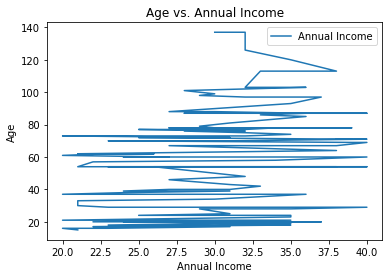

In [45]:
%matplotlib inline
age_income_df.plot(y='Annual Income',x='Age',kind='line',title='Age vs. Annual Income')
plt.ylabel('Age')
plt.xlabel('Annual Income')
plt.show()
#we use this when we have continuous dataset then we are interested in visualizing the data over the period of time

In [46]:
# Area Plot-area chart or area graph
# used to represent cumulated totals using numbers or percentages over time
# It is based on the line plot and is commonly used when
# trying to compare two or more quantities.


In [47]:
df.sort_values(['Annual Income'],ascending=False,axis=0,inplace=True)
custom_df=df[['Annual Income','Spending Score (1-100)']]
custom_df.reset_index(drop=True, inplace=True)
custom_df

,Annual Income,Spending Score (1-100)
0,137,83
1,137,18
2,126,74
3,126,28
4,120,79
...,...,...
195,17,76
196,16,6
197,16,77
198,15,81


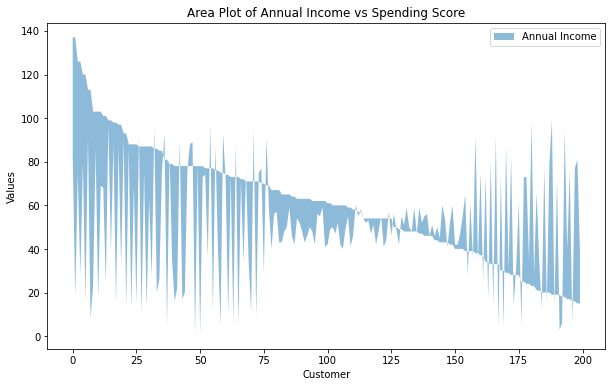

In [48]:
# custom_df.plot(kind='area')
plt.figure(figsize=(10, 6))
plt.fill_between(custom_df.index, custom_df['Annual Income'], custom_df['Spending Score (1-100)'], alpha=0.5)
plt.xlabel('Customer')
plt.ylabel('Values')
plt.title('Area Plot of Annual Income vs Spending Score')
plt.legend(['Annual Income', 'Spending Score (1-100)'])
plt.show()

In [49]:
help(plt.fill_between)

Help on function fill_between in module matplotlib.pyplot:

fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs)
    Fill the area between two horizontal curves.
    
    The curves are defined by the points (*x*, *y1*) and (*x*,
    *y2*).  This creates one or multiple polygons describing the filled
    area.
    
    You may exclude some horizontal sections from filling using *where*.
    
    By default, the edges connect the given points directly.  Use *step*
    if the filling should be a step function, i.e. constant in between
    *x*.
    
    Parameters
    ----------
    x : array (length N)
        The x coordinates of the nodes defining the curves.
    
    y1 : array (length N) or scalar
        The y coordinates of the nodes defining the first curve.
    
    y2 : array (length N) or scalar, default: 0
        The y coordinates of the nodes defining the second curve.
    
    where : array of bool (length N), optional
        Define *

In [50]:
# A histogram is a way of representing the frequency distribution
# of a numeric dataset.

In [51]:
annual_income=df[['Annual Income']]
annual_income

,Annual Income
199,137
198,137
197,126
196,126
195,120
...,...
5,17
2,16
3,16
1,15


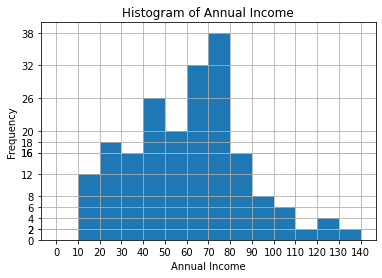

In [52]:
custom_bins = range(0, 141, 10)
# plt.hist(annual_income,bins=custom_bins, edgecolor='black', color='skyblue')
hist, bin_edges, _ = plt.hist(annual_income, bins=custom_bins)

plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Income')
plt.xticks(bin_edges)
plt.yticks(hist)
plt.grid(True)
plt.show()

In [53]:
# barchart is used to compare the values of a variable
# at a given point in time

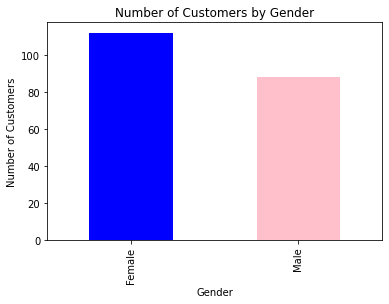

In [54]:
gender_counts = df['Gender'].value_counts()

# Create a bar chart
plt.figure()  # Adjust the figure size if needed
gender_counts.plot(kind='bar', color=['blue', 'pink'])
# Create a bar chart using pyplot
# plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Gender')

# Show the chart
plt.show()

In [55]:
# pie chart is a circular statistical graphic divided into slices to illustrate
# numerical prop

Text(0.5, 1.0, 'Gender Distribution in the Mall Customer Dataset')

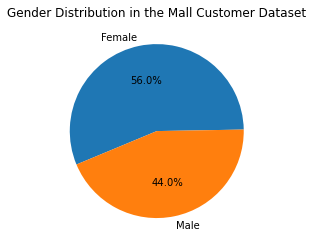

In [56]:
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=1)
plt.title('Gender Distribution in the Mall Customer Dataset')
# plt.axis('equal')

In [57]:
# boxplot is a way of statistically representing the distribution of given data
# through 5 dimensions
# minimum,which is the smallest number in the sorted data
# first quartile, which is the point 25% of the way through the sorted data
# median of the sorted data
# third quartile,which is the point 75% of the way through the sorted data
# Maximum,which is the highest number in the sorted data

Text(0, 0.5, 'Values')

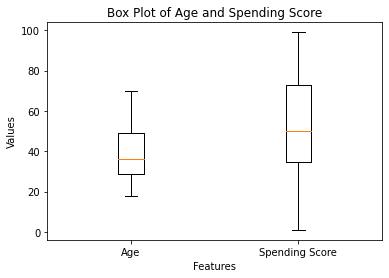

In [58]:
plt.boxplot([df['Age'], df['Spending Score (1-100)']], labels=['Age', 'Spending Score'])
plt.title('Box Plot of Age and Spending Score')
plt.xlabel('Features')
plt.ylabel('Values')

In [59]:
# scatter plot is a type of plot that displays values pertaining
# to typically 2 variables against each other
# usually it is a dependent variable to be plotted against an
# independent variable in order to determine if any
# correlation bw the 2 variables exists

Text(0, 0.5, 'Spending Score')

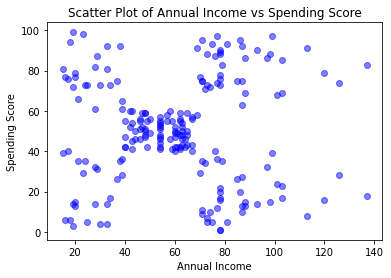

In [60]:
plt.scatter(df['Annual Income'], df['Spending Score (1-100)'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [61]:
# waffle chart is created to display progress toward goals
# it is a way to visualiize data in relation to a whole

In [62]:
# Seaborn and regression plots

Text(0.5, 1.0, 'Regression Plot: Age vs. Spending Score')

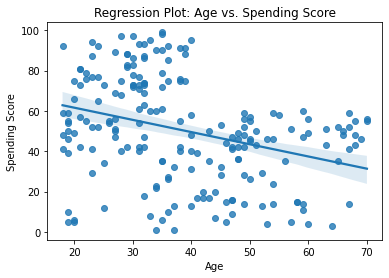

In [63]:
import seaborn as sns
# scatter plot with a linear regression line
sns.regplot(x='Age', y='Spending Score (1-100)', data=df)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Regression Plot: Age vs. Spending Score')

Text(0, 0.5, 'Annual Income')

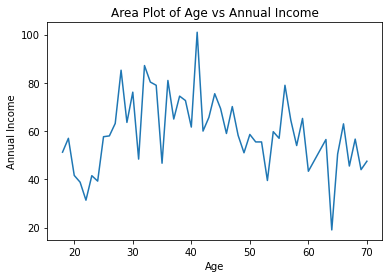

In [64]:
sns.lineplot(x='Age', y='Annual Income', data=df, ci=None)

# Customize the plot
plt.title('Area Plot of Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')

In [65]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income              int64
Spending Score (1-100)     int64
dtype: object

In [66]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [67]:
# data preprocessing
# the process of converting or mapping data from the initial raw form into another format in order to prepare the data for further analysis
# also known as data cleaning , data wrangling
# identify and handle missing values
# data formatting
# data normalization(centering/scaling)
# data binning
# turning categorical values to numeric variables

In [68]:
# deal with missing data
# drop the missing values
#   either drop the variable
#   or drop the data entry
# replace the missing values
#   replace it with an average(of similar datapoints)
#   replace it with frequency
#   replace it based on other functions
# leave it as missing data

In [69]:
# drop missing values
# axis =0 to drop the rows
# axis =1 to drop the column that contains the missing values

# inplace=True allows the modification to be done on the dataset directly 
# df.dropna(subset=['price'],axis=0,inplace=True)

df.dropna()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
199,200,Male,30,137,83
198,199,Male,32,137,18
197,198,Male,32,126,74
196,197,Female,45,126,28
195,196,Female,35,120,79
...,...,...,...,...,...
5,6,Female,22,17,76
2,3,Female,20,16,6
3,4,Female,23,16,77
1,2,Male,21,15,81


In [70]:
# replace missing values
# missing values like NaN
# df.replace(missing_value,new_value)

# import numpy as np
# mean =df['age'].mean()
# df['age'].replace(np.nan,mean)


In [71]:
# methods of normalizing data
# *simple feature scaling [x new = x old/x max]
# *min-max [x new = (x old - x min)/(x max - x min)]
# *z-score [(x old - Mu)/sigma]

In [72]:
# binning
# grouping of values into bins
# converts numeric into categorical variables
# group a set of numerical values into a set of bins

In [73]:
# turn categorical variables into quantitative variables
# pd.get_dummies() method gets the fuel-type column and creates the
# dataframe"dummy_variable_1".
# The get_dummies() method automatically generates a list of numbers, each one corresponding
# to a particular category of the variable.

In [74]:
# Exploratory Data Analysis, or in short “EDA”, is an approach to analyze data in order to:
# - summarize main characteristics of the data - gain better understanding of the dataset
# uncover relationships between different variables, and
# - extract important variables for the problem we are trying to solve.

# descriptive statistics
# When you begin to analyze data, it’s important to first explore your data before you spend
# time building complicated models. One easy way to do so is to calculate some
# descriptive statistics for your data. Descriptive statistical analysis helps to
# describe basic features of a dataset and obtains a short summary about the sample and measures of the data

In [75]:
# one way is to summarize statistic using pandas describe()method
# df.describe()

In [76]:
#summarize the categorical data by using the value_counts() method
age_count=df['Age'].value_counts()
age_count

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
38     6
23     6
36     6
40     6
20     5
50     5
21     5
48     5
29     5
34     5
59     4
67     4
18     4
54     4
28     4
24     4
68     3
22     3
60     3
25     3
43     3
39     3
46     3
45     3
33     3
37     3
63     2
26     2
53     2
70     2
44     2
41     2
42     2
51     2
57     2
52     2
66     2
65     2
58     2
56     1
55     1
69     1
64     1
Name: Age, dtype: int64

In [77]:
gender_count=df['Gender'].value_counts()
gender_count

Female    112
Male       88
Name: Gender, dtype: int64

In [78]:
# boxplots are a great way to visualize numeric data
# since you can visualize various distributions of the data

In [79]:
# group by method is used on categorical variables
# groups the data into subsets according to the different
# categories of that variable
# group by a single or multiple variables

In [80]:
df_test=df[['Gender','Age','Annual Income','Spending Score (1-100)']]
df_test

,Gender,Age,Annual Income,Spending Score (1-100)
199,Male,30,137,83
198,Male,32,137,18
197,Male,32,126,74
196,Female,45,126,28
195,Female,35,120,79
...,...,...,...,...
5,Female,22,17,76
2,Female,20,16,6
3,Female,23,16,77
1,Male,21,15,81


In [81]:
df_grp=df_test.groupby(['Gender'],as_index=False).mean()
df_grp

,Gender,Age,Annual Income,Spending Score (1-100)
0,Female,38.098214,59.250000,51.526786
1,Male,39.806818,62.227273,48.511364


In [82]:
# df_pivot=df_grp.pivot(index='Gender',columns='')
# df_pivot

In [83]:
# another way to represent the pivot table is using the heatmap plot
# heatmap takes a rectangular grid and assigns a color intensity

In [84]:
# plt.pcolor(df_grp,cmap='RdBu')
# plt.colorbar()

In [85]:
corr_matrix=df.corr()
corr_matrix

,CustomerID,Age,Annual Income,Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income,0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


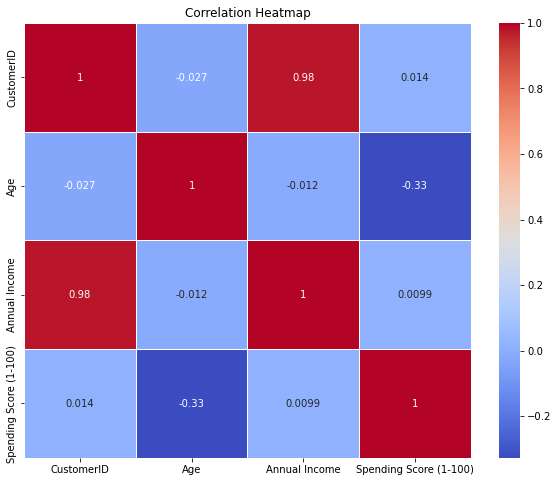

In [86]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [109]:
df_anova=df[["Age","Spending Score (1-100)"]]
grouped_anova=df_anova.groupby(["Age"])
anova_results_1=stats.f_oneway(grouped_anova.get_group(30)["Spending Score (1-100)"],grouped_anova.get_group(40)["Spending Score (1-100)"])
anova_results_1

F_onewayResult(statistic=8.711749912600228, pvalue=0.013172423132837553)

In [90]:
len(df['Age'])

200

In [93]:
len([df['Annual Income']])

1

In [94]:
len(df['Spending Score (1-100)'])

200

In [99]:
import seaborn as sns

In [ ]:
# correlation can be positive linear and negative linear relationship

(0.0, 103.9)

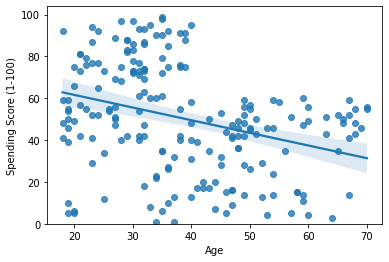

In [101]:
sns.regplot(x='Age',y="Spending Score (1-100)",data=df)
plt.ylim(0,)

In [105]:
from scipy import stats

In [102]:
# corelation statistics
# pearson corelation
# measure the strength of the corelation bw 2 feature
# it gives 2 values 
# corelation coeficent
# p value

# for corelation coeficent 
#  value close to +1:large positive relationship
#  value close to -1:large negative relationship
#  value close to 0:no relationship
    
# for p value
# p value<0.001 strong certainity
# p value<0.05 moderate certainity
# p value<0.1 weak certainity
# p value>0.1 no certainity in result

# Strong corelation:
#     corelation coeficent close to 1 or -1
#     pvalue less than 0.001

In [108]:
pearson_coef,p_value=stats.pearsonr(df["Annual Income"],df["Spending Score (1-100)"])
print(pearson_coef,p_value)

0.009902848094037615 0.8893134370274359


In [112]:
# Fitting a simple linear model estimator
# x:predictor varibale
# y:target variable

In [113]:
# import linear_model from scikit-learn
from sklearn.linear_model import LinearRegression

In [114]:
# create a linear regression object using the constructor
lm=LinearRegression()

In [115]:
# we define the predictor and target variable
X=df[["Age"]]
Y=df['Annual Income']

In [117]:
# then use lm.fit(X,Y) to fit the model ,and find the parameters b0 and b1
lm.fit(X,Y)

LinearRegression()

In [119]:
# we can obtain a prediction
Yhat=lm.predict(X)
Yhat

array([60.7663021 , 60.71968016, 60.71968016, 60.41663752, 60.64974724,
       60.37001558, 60.57981433, 60.69636918, 60.67305821, 60.62643627,
       60.50988141, 60.71968016, 60.81292404, 60.20683878, 60.7663021 ,
       60.50988141, 60.78961307, 60.39332655, 60.71968016, 60.6031253 ,
       60.64974724, 60.09028392, 60.7663021 , 60.25346072, 60.83623502,
       60.11359489, 60.62643627, 60.62643627, 60.81292404, 60.53319238,
       60.71968016, 60.62643627, 60.69636918, 60.48657044, 60.30008266,
       60.62643627, 60.74299113, 61.02272279, 60.78961307, 60.16021683,
       60.37001558, 60.67305821, 60.67305821, 60.46325947, 60.4399485 ,
       60.57981433, 60.55650335, 60.83623502, 60.6031253 , 60.7663021 ,
       60.67305821, 60.7663021 , 60.71968016, 60.34670461, 60.81292404,
       60.88285696, 60.71968016, 60.81292404, 60.13690586, 60.71968016,
       60.64974724, 61.02272279, 60.71968016, 60.4399485 , 60.78961307,
       60.99941182, 60.74299113, 60.88285696, 60.57981433, 60.46

In [120]:
# we can view the intercept(b0)
lm.intercept_

61.46563125297761

In [121]:
# we can also view the slope(b1)
lm.coef_

array([-0.02331097])

In [125]:
# the realtionship bw Annual income and age is given by
# Annual Income=lm.intercept_+lm.coef_*Age
# Yhat = b0 + b1*X

In [126]:
# Multiple linear regression
# this method is used to explain the relationship between
# one continuous target(Y) variable
# Two or more predictor(X) variables

# Y hat=b0+b1x1+b2x2+b3x3+b4x4
# b0:intercept(x=0)
# b1=the coefficent or parameter of x1
# b2=the coefficent of parameter of x2 and so on

# Y hat =+2x1 + 3x2
# the variable x1 and x2 can be visualixed on a 2 d plane

In [127]:
# fitting a multiple linear model estimator
Z=df[["Age","Annual Income"]]

In [128]:
# then train the model as before:
lm.fit(Z,df["Spending Score (1-100)"])

LinearRegression()

In [129]:
# we can also obtain a prediction
Yhat=lm.predict(Z)
Yhat

array([55.9917871 , 54.78221258, 54.71897843, 46.85674408, 52.8701253 ,
       45.61267821, 51.01552361, 54.0394599 , 53.37718705, 52.16761254,
       49.14367625, 54.58676157, 56.99441348, 41.26994478, 55.77334185,
       49.12068201, 56.37238055, 46.09099716, 54.55227021, 51.52833393,
       52.7149142 , 38.20002002, 55.7101077 , 42.40478802, 57.52446947,
       38.77606448, 52.07563559, 52.07563559, 56.91393365, 49.65648656,
       54.49478462, 52.07563559, 53.88424881, 48.44116348, 43.59711686,
       52.06413847, 55.06508052, 62.32252762, 56.26315792, 39.93390196,
       45.37123872, 53.23347307, 53.23347307, 47.79038775, 47.18560049,
       50.81432404, 50.20953678, 57.46698388, 51.4191113 , 55.65262211,
       53.23347307, 55.65262211, 54.43729903, 44.7607029 , 56.85644806,
       58.67080984, 54.43155047, 56.8506995 , 39.30612046, 54.42580191,
       52.60569158, 62.2822877 , 54.41430479, 47.1568577 , 56.22866657,
       61.67175189, 55.01334349, 58.64206704, 50.77408413, 47.75

In [130]:
# find the intercept b0
lm.intercept_

73.34785222186396

In [131]:
# find the coefficents(b1 b2 b3, and so on)
lm.coef_

array([-0.60478726,  0.00574856])

In [132]:
# then we can find our estimated linear model
# Spending score=lm.intercept+(lm.coef*feature1)+(lm.coef*feature2)
# Y hat =b0+ b1x1+b2x2+b3x3 and so on